In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
fact_internet_sales = pd.read_csv('../CSVs/FACT_InternetSales.csv')
fact_internet_sales.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount
0,381,20210101,20210113,20210108,16942,SO46700,1000.4375
1,375,20210101,20210113,20210108,15114,SO46701,2181.5625
2,369,20210101,20210113,20210108,15116,SO46702,2443.3500
3,337,20210101,20210113,20210108,20576,SO46703,782.9900
4,370,20210101,20210113,20210108,13059,SO46704,2443.3500


In [3]:
fact_internet_sales.dtypes

ProductKey            int64
OrderDateKey          int64
DueDateKey            int64
ShipDateKey           int64
CustomerKey           int64
SalesOrderNumber     object
SalesAmount         float64
dtype: object

In [4]:
fact_internet_sales.describe()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesAmount
count,58168.000000,5.816800e+04,5.816800e+04,5.816800e+04,58168.000000,58168.000000
mean,442.020320,2.022047e+07,2.022083e+07,2.022067e+07,18844.174942,382.336169
std,118.031489,2.976337e+03,3.362381e+03,3.159250e+03,5402.558917,755.592295
min,214.000000,2.021010e+07,2.021011e+07,2.021011e+07,11000.000000,2.290000
25%,368.000000,2.022041e+07,2.022043e+07,2.022042e+07,14034.000000,7.950000
50%,480.000000,2.022072e+07,2.022080e+07,2.022073e+07,18146.000000,28.990000
75%,529.000000,2.022102e+07,2.022110e+07,2.022103e+07,23414.000000,69.990000
max,606.000000,2.023013e+07,2.023021e+07,2.023020e+07,29483.000000,2443.350000


In [5]:
fact_internet_sales.isnull().sum()

ProductKey          0
OrderDateKey        0
DueDateKey          0
ShipDateKey         0
CustomerKey         0
SalesOrderNumber    0
SalesAmount         0
dtype: int64

### No need to check for Outliers because this is a FACT table and not a dimension table

### We need to look into the date's datatypes

In [7]:
fact_internet_sales['OrderDateKey'] = pd.to_datetime(fact_internet_sales['OrderDateKey'], format='%Y%m%d', errors='coerce')
fact_internet_sales['DueDateKey'] = pd.to_datetime(fact_internet_sales['DueDateKey'], format='%Y%m%d', errors='coerce')
fact_internet_sales['ShipDateKey'] = pd.to_datetime(fact_internet_sales['ShipDateKey'], format='%Y%m%d', errors='coerce')

In [8]:
fact_internet_sales.dtypes

ProductKey                   int64
OrderDateKey        datetime64[ns]
DueDateKey          datetime64[ns]
ShipDateKey         datetime64[ns]
CustomerKey                  int64
SalesOrderNumber            object
SalesAmount                float64
dtype: object

In [32]:
fact_internet_sales

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount
0,381,2021-01-01,2021-01-13,2021-01-08,16942,SO46700,1000.4375
1,375,2021-01-01,2021-01-13,2021-01-08,15114,SO46701,2181.5625
2,369,2021-01-01,2021-01-13,2021-01-08,15116,SO46702,2443.3500
3,337,2021-01-01,2021-01-13,2021-01-08,20576,SO46703,782.9900
4,370,2021-01-01,2021-01-13,2021-01-08,13059,SO46704,2443.3500
...,...,...,...,...,...,...,...
58163,485,2023-01-28,2023-02-09,2023-02-04,15868,SO75122,21.9800
58164,225,2023-01-28,2023-02-09,2023-02-04,15868,SO75122,8.9900
58165,485,2023-01-28,2023-02-09,2023-02-04,18759,SO75123,21.9800
58166,486,2023-01-28,2023-02-09,2023-02-04,18759,SO75123,159.0000


### Univariate Analysis

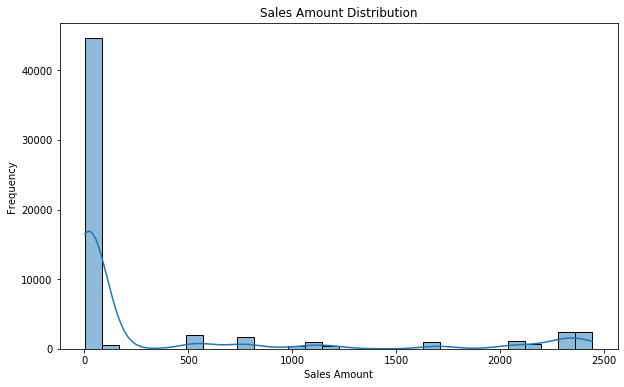

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(fact_internet_sales['SalesAmount'], bins=30, kde=True)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

### We can conclude that company make lesser income from costlier products than the cheap ones. Lets take a look into the cheaper ones in detail

In [10]:
modified_fact_internet_sales = fact_internet_sales.loc[fact_internet_sales["SalesAmount"] < 500]

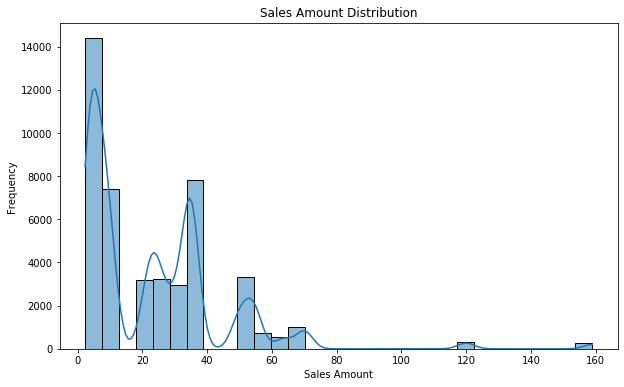

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(modified_fact_internet_sales['SalesAmount'], bins=30, kde=True)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

### We can clearly get a inference that the company has more amount of sales for low priced products


In [18]:
customer_sales = fact_internet_sales.groupby('CustomerKey')['SalesAmount'].sum().reset_index()

# Select top 20 customers by total sales amount
top_customers = customer_sales.nlargest(20, 'SalesAmount')

# Filter the original dataset to include only the top customers
top_customers_sales = fact_internet_sales[fact_internet_sales['CustomerKey'].isin(top_customers['CustomerKey'])]

top_customers_sales


,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount
11,369,2021-01-02,2021-01-14,2021-01-09,13592,SO46711,2443.3500
170,368,2021-01-21,2021-02-02,2021-01-28,13605,SO46870,2443.3500
645,369,2021-03-20,2021-04-01,2021-03-27,14186,SO47595,2443.3500
2102,360,2021-09-10,2021-09-22,2021-09-17,11241,SO49675,2049.0982
2179,360,2021-09-19,2021-10-01,2021-09-26,11242,SO49752,2049.0982
...,...,...,...,...,...,...,...
54656,222,2022-12-21,2023-01-02,2022-12-28,11425,SO73635,34.9900
55245,576,2022-12-24,2023-01-05,2022-12-31,11429,SO73864,2384.0700
55246,541,2022-12-24,2023-01-05,2022-12-31,11429,SO73864,28.9900
55247,530,2022-12-24,2023-01-05,2022-12-31,11429,SO73864,4.9900


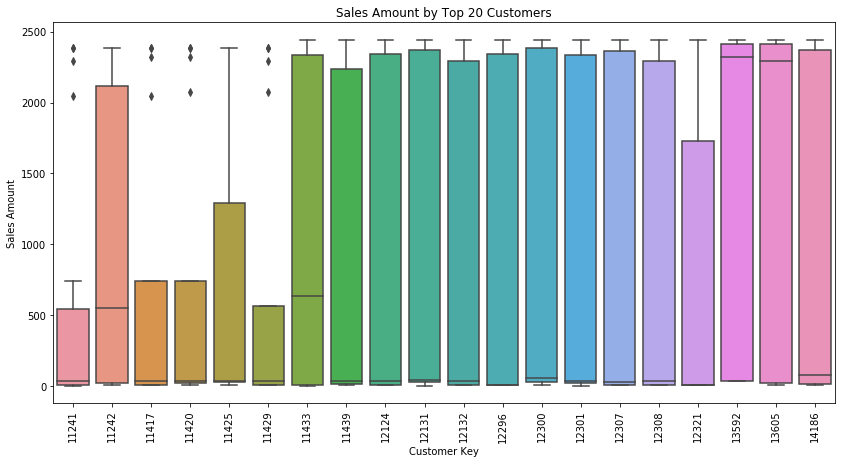

In [17]:
# Plot the boxplot for the top customers
plt.figure(figsize=(14, 7))
sns.boxplot(data=top_customers_sales, x='CustomerKey', y='SalesAmount')
plt.title('Sales Amount by Top 20 Customers')
plt.xlabel('Customer Key')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()

### We can clearly see our top customers get products in varity of all prices. Only A few have purchased only costliers products couple of times and given more income to company

### So it is recommended that the company must focus on buying good with varity of prices

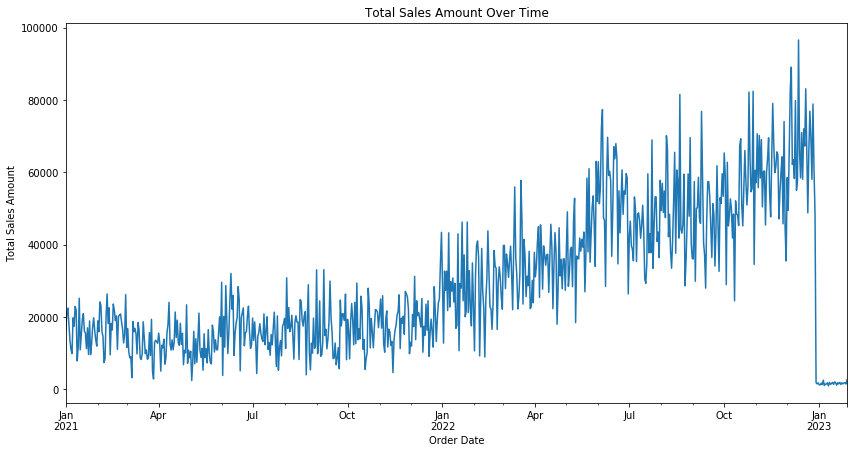

In [24]:
# Sales Amount Over Time
plt.figure(figsize=(14, 7))
fact_internet_sales.groupby('OrderDateKey')['SalesAmount'].sum().plot()
plt.title('Total Sales Amount Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales Amount')
plt.show()


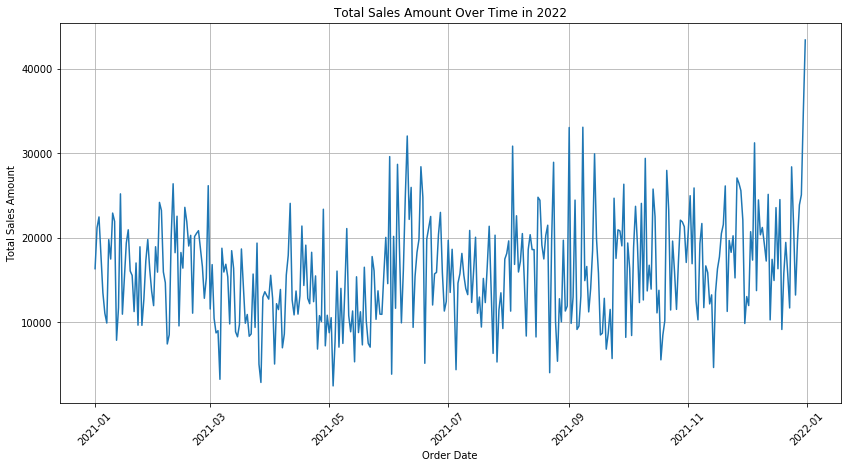

In [27]:
sales_2022 = fact_internet_sales[fact_internet_sales['OrderDateKey'].dt.year == 2021]

sales_2022_grouped = sales_2022.groupby('OrderDateKey')['SalesAmount'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(sales_2022_grouped['OrderDateKey'], sales_2022_grouped['SalesAmount'])
plt.title('Total Sales Amount Over Time in 2022')
plt.xlabel('Order Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Its clear that the company is increasing its profit every year. Be we can notice There is a dip in purchase during the months of may and we have increased purchase as we near the new year and christmas(That is near the november month). So we must import more goods during festival seasons

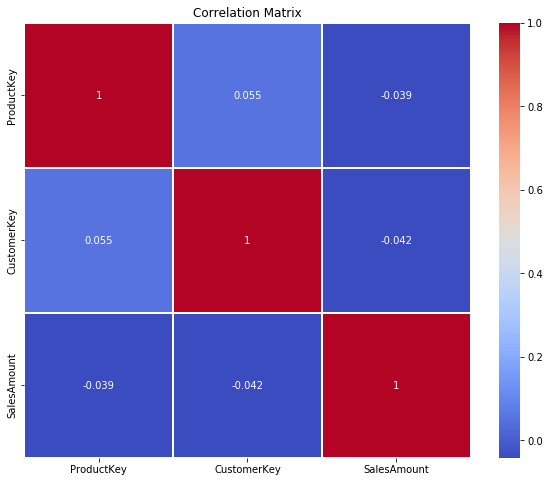

In [31]:
correlation_matrix = fact_internet_sales.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### We need to get correlation analysis comparing with the dates as well. So We need to encode the dates inorder to do a correlations analysis

In [35]:
label_encoder = LabelEncoder()

fact_internet_sales["OrderDateKeyLabeled"] = label_encoder.fit_transform(fact_internet_sales["OrderDateKey"])
fact_internet_sales["DueDateKeyLabeled"] = label_encoder.fit_transform(fact_internet_sales["DueDateKey"])
fact_internet_sales["ShipDateKeyLabeled"] = label_encoder.fit_transform(fact_internet_sales["ShipDateKey"])

fact_internet_sales

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount,OrderDateKeyLabeled,DueDateKeyLabeled,ShipDateKeyLabeled
0,381,2021-01-01,2021-01-13,2021-01-08,16942,SO46700,1000.4375,0,0,0
1,375,2021-01-01,2021-01-13,2021-01-08,15114,SO46701,2181.5625,0,0,0
2,369,2021-01-01,2021-01-13,2021-01-08,15116,SO46702,2443.3500,0,0,0
3,337,2021-01-01,2021-01-13,2021-01-08,20576,SO46703,782.9900,0,0,0
4,370,2021-01-01,2021-01-13,2021-01-08,13059,SO46704,2443.3500,0,0,0
...,...,...,...,...,...,...,...,...,...,...
58163,485,2023-01-28,2023-02-09,2023-02-04,15868,SO75122,21.9800,757,757,757
58164,225,2023-01-28,2023-02-09,2023-02-04,15868,SO75122,8.9900,757,757,757
58165,485,2023-01-28,2023-02-09,2023-02-04,18759,SO75123,21.9800,757,757,757
58166,486,2023-01-28,2023-02-09,2023-02-04,18759,SO75123,159.0000,757,757,757


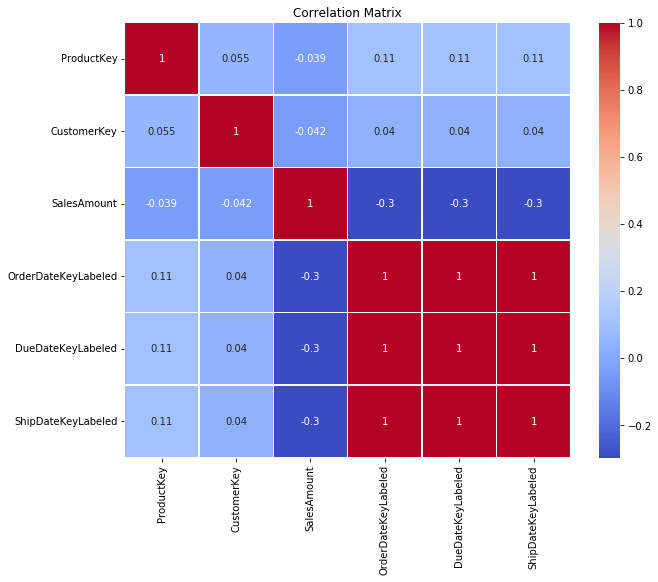

In [36]:
correlation_matrix = fact_internet_sales.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### We can see that there is not real correlation between sales amount and Customer. This is because the top customer are outliers. So we can remove them while model Building

### And its also clear that order,due and ship dates are realted and its self explanatory